In [163]:
import keras
from keras.datasets import mnist

In [164]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [165]:
y_train_converted = keras.utils.to_categorical(y_train)
y_test_converted = keras.utils.to_categorical(y_test)

y_train_converted

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

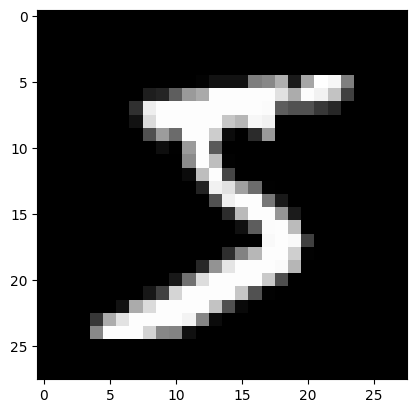

In [166]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")

In [167]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [168]:
x_train.shape

(60000, 28, 28)

In [169]:
x_train_remolded = x_train.reshape((60000, 784))
x_test_remolded = x_test.reshape((10000, 784))

x_train_normalized = x_train_remolded.astype("float32") / 255
x_test_normalized = x_test_remolded.astype("float32") / 255
x_train_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [170]:
model = Sequential()
model.add(keras.Input((x_train_normalized.shape[1],)))
model.add(Dense(30, kernel_initializer="normal", activation="relu"))
model.add(Dense(30, kernel_initializer="normal", activation="relu"))
model.add(Dense(10, kernel_initializer="normal", activation="softmax"))

In [171]:
from keras.optimizers import SGD

optimizer = SGD()

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"])
historic = model.fit(
    x_train_normalized,
    y_train_converted,
    epochs=50,
    batch_size=40,
    validation_data=(x_test_normalized, y_test_converted),
    verbose=1,
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.2168 - loss: 2.2614 - val_acc: 0.5155 - val_loss: 1.5923
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.6212 - loss: 1.1939 - val_acc: 0.8088 - val_loss: 0.6148
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - acc: 0.8238 - loss: 0.5759 - val_acc: 0.8774 - val_loss: 0.4222
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - acc: 0.8804 - loss: 0.4191 - val_acc: 0.8988 - val_loss: 0.3473
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - acc: 0.9018 - loss: 0.3478 - val_acc: 0.9096 - val_loss: 0.3146
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9097 - loss: 0.3126 - val_acc: 0.9152 - val_loss: 0.2899
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - acc: 0.9203 - loss: 0.2791 - val_acc: 0.9232 - val_loss: 0.2650
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - acc: 0.9237 - loss: 0.2707 - val_acc: 0.9277 - val_loss: 0.2435
Epoch 9/50
1500/1500 ━━━━━━━━━

In [172]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,792 (96.85 KB)

 Trainable params: 24,790 (96.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

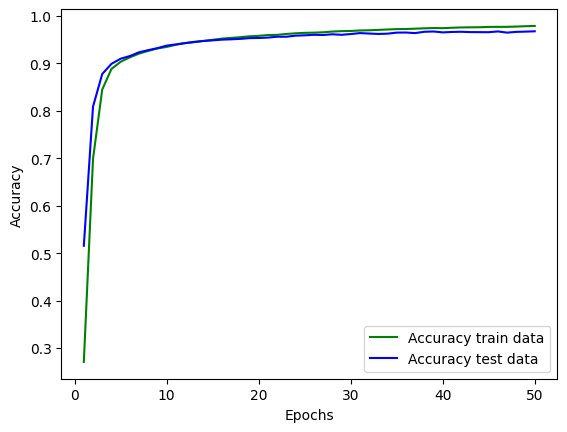

In [173]:
accuracy_train = historic.history["acc"]
accuracy_test = historic.history["val_acc"]
epochs = range(1, len(accuracy_train) + 1)

plt.plot(epochs, accuracy_train, "-g", label="Accuracy train data")
plt.plot(epochs, accuracy_test, "-b", label="Accuracy test data")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()